In [5]:
import ants
import nibabel as nib
import sys
from Constants.directory_paths import ixi_t1_root

### Atropos Segmentation

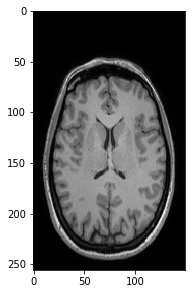

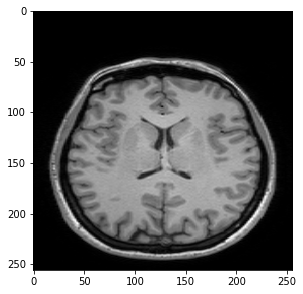

dict_keys(['segmentation', 'probabilityimages'])


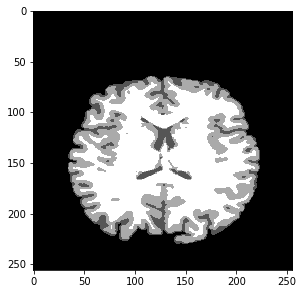

In [6]:
image = nib.load(ixi_t1_root + 'IXI002-Guys-0828-T1.nii.gz').get_data()
image = image[:, 150, :]
image = ants.from_numpy(image)
ants.plot(image)
image = ants.resample_image(image, (256,256), 1, 0)
ants.plot(image)

mask = ants.get_mask(image)
img_seg = ants.atropos(a=image, m='[0.2,1x1]', c='[2,0]', i='kmeans[3]', x=mask)
print(img_seg.keys())
ants.plot(img_seg['segmentation'])

### Cortical thickness

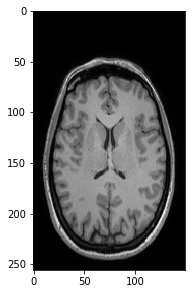

TypeError: plot() got an unexpected keyword argument 'overlay'

In [8]:
image = nib.load(ixi_t1_root + 'IXI002-Guys-0828-T1.nii.gz').get_data()
image = image[:, 150, :]
image = ants.from_numpy(image)
ants.plot(image)

mask = ants.get_mask(image).threshold_image(1,2)
segs=ants.atropos( a = image, m = '[0.2,1x1]', c = '[2,0]',  i = 'kmeans[3]', x = mask )
thickimg = ants.kelly_kapowski(s=segs['segmentation'], g=segs['probabilityimages'][1],
                            w=segs['probabilityimages'][2], its=45, 
                            r=0.5, m=1)
image.plot(overlay=thickimg)